In [ ]:
    # инструменты API для чтения и записи I/O

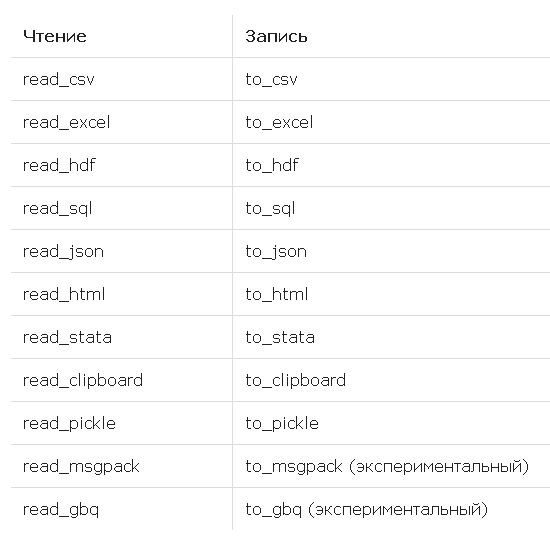

In [ ]:
    # read_csv 
    # Команда используется для чтения файлов формата csv, данные в которых разделены запятыми

    # read_table
    # используя же эту команду, необходимо явно указать разделитель как показано в примере
    # -------------------
    # pd.read_table('ch05_01.csv',sep=',')
    # -------------------
    # ИНОГДА
    # бывает так что данные начинаются с первой строки файла, тогда при чтении, первая строка будет выступать в виде заголовков колонок, в таком случае нужно убедиться, что pandas не присвоит названиям колонок значения первой строки, передав None параметру header
    # -------------------
    # pd.read_csv('ch05_02.csv', header=None)
    # -------------------
    # Также можно самостоятельно определить названия, присвоив список меток параметру names.


    # В более сложных случаях когда нужно создать Dataframe с иерархической структурой на основе данных из файла CSV, можно расширить возможности функции read_csv() добавив параметр index_col, который конвертирует колонки в значения индексов.

In [ ]:
    # например из таких данных

    # color,status,item1,item2,item3
    # black,up,3,4,6
    # black,down,2,6,7
    # white,up,5,5,5
    # white,down,3,3,2
    # white,left,1,2,1
    # red,up,2,2,2
    # red,down,1,1,4

    # получается такая таблица

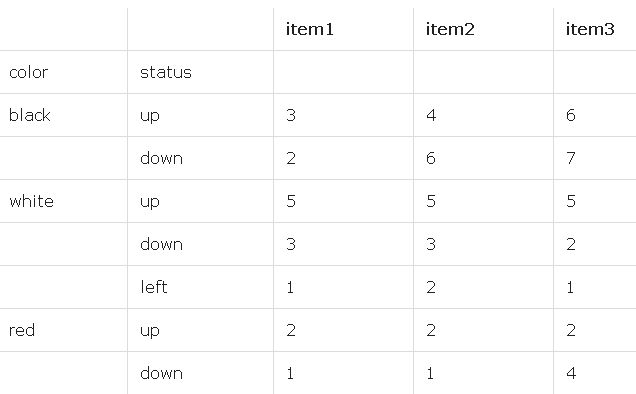

In [ ]:
    # Использованием RegExp для парсинга файлов TXT
    # Иногда бывает так, что в файлах, из которых нужно получить данные, нет разделителей, таких как запятая или двоеточие. В таких случаях на помощь приходят регулярные выражения. Задать такое выражение можно в функции read_table() с помощью параметра sep.

    # Чтобы лучше понимать regexp и то, как их использовать для разделения данных, начнем с простого примера. Например, предположим, что файл TXT имеет значения, разделенные пробелами и отступами хаотично. В таком случае regexp подойдут идеально, ведь они позволяют учитывать оба вида разделителей. Подстановочный символ /s* отвечает за все символы пробелов и отступов (если нужны только отступы, то используется /t), а * указывает на то, что символов может быть несколько. Таким образом значения могут быть разделены большим количеством пробелов.

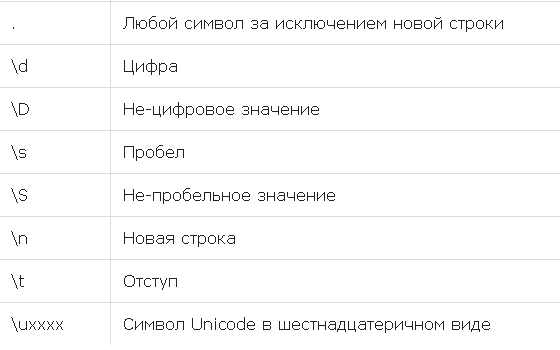

In [9]:
import pandas as pd
import numpy as np
import re
    # -------------------
    # pd.read_table('ch05_04.txt',sep='\s+', engine='python')
    # -------------------
    # такой пример кода подойдет для хаотчных отступов и пробелов

rx = pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds01.csv', sep='\s+', engine='python')
rx

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Максим Феликсович\AppData\Local\Temp\ipykernel_3960\3566746044.py:7: SyntaxWarning: invalid escape sequence '\s'
  rx = pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds01.csv', sep='\s+', engine='python')


,white,red,blue,green
0,1,5,2,3
1,2,7,8,5
2,3,3,6,7


In [12]:
import pandas as pd
import numpy as np
import re

rx = pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds02.csv', sep='\D+', header=None, engine='python')
rx

    # В следующем примере необходимо извлечь цифровую часть из файла TXT, в котором последовательность символов перемешана с буквами.

    # Не забудьте задать параметр None для параметра header, если в файле нет заголовков колонок.

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Максим Феликсович\AppData\Local\Temp\ipykernel_3960\29271543.py:5: SyntaxWarning: invalid escape sequence '\D'
  rx = pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds02.csv', sep='\D+', header=None, engine='python')


,0,1,2
0,0,123,122
1,1,124,321
2,2,125,333


In [33]:
import pandas as pd
import numpy as np
import re

pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds03.csv',sep=',', skiprows=[0,1,3,6])

    # Благодаря параметру skiprows можно исключить любые строки, просто присвоим ему массив с номерами строк, которые не нужно парсить.

    # Обратите внимание на способ использования параметра. Если нужно исключить первые пять строк, то необходимо писать skiprows = 5, но для удаления только пятой строки — [5].

,white,red,blue,green,animal
0,1,5,2,3,cat
1,2,7,8,5,dog
2,3,3,6,7,horse
3,2,2,8,3,duck
4,4,4,2,1,mouse


In [46]:
import pandas as pd
import numpy as np
import re

pd.read_table('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds04.csv', sep=',', header=None, skiprows=[1], nrows=3)
    # данный код убирает каждую третью строку, при этом мы пропускаем первую строку, строки убираются с учетом того что первой строкой с нулевым индексом будет первая строка нашего датасета


    # При обработке крупных файлов или необходимости использовать только отдельные их части часто требуется считывать их кусками. Это может пригодится, если необходимо воспользоваться перебором или же целый файл не нужен.

    # Если требуется получить лишь часть файла, можно явно указать количество требуемых строк. Благодаря параметрам nrows и skiprows можно выбрать стартовую строку n (n = SkipRows) и количество строк, которые нужно считать после (nrows = 1).

,0,1,2,3,4
0,1,5,2,3,cat
1,3,3,6,7,horse
2,2,2,8,3,duck


In [ ]:
import pandas as pd
import numpy as np
import re

chunk = 100
df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\supermarket\\supermarket_sales_sheet1.csv', chunksize = chunk)

for chunk_size in df:
    print(chunk_size.head(1))
    # в данном примере мы разбиваем код на порции по 100, затем выводим каждую первую строку из каждой порции
    # важно учесть что при выполнении разделения таким способом, объект превращается в объект типа TextFileReader

In [69]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(np.arange(16).reshape((4,4)),
		 index = ['red', 'blue', 'yellow', 'white'],
		 columns = ['ball', 'pen', 'pencil', 'paper'])

frame.to_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds05.csv')

	# произвели запись созданного фрейма в файл csv

In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds05.csv', sep=',')

frame = df.rename(columns={'Unnamed: 0': 'colors'})
frame
    # df = df.rename(columns={'старое_имя1': 'новое_имя1', 'старое_имя2': 'новое_имя2'})

,colors,ball,pen,pencil,paper
0,red,0,1,2,3
1,blue,4,5,6,7
2,yellow,8,9,10,11
3,white,12,13,14,15


In [89]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(np.arange(16).reshape((4,4)),
		 index = ['red', 'blue', 'yellow', 'white'],
		 columns = ['ball', 'pen', 'pencil', 'paper'])

frame.to_csv('C:\\Users\\Максим Феликсович\\Documents\\GitHub\\my_data_analyst_road\\test_dataset\\my_dataset\\ds06.csv', header=False, index=False)

frame
	# Важно запомнить, что при записи файлов значения NaN из структуры данных представлены в виде пустых полей в файле.
    # Но их можно заменить на любое значение, воспользовавшись параметром na_rep из функции to_csv. Это может быть NULL, 0 или то же NaN.

,ball,pen,pencil,paper
red,0,1,2,3
blue,4,5,6,7
yellow,8,9,10,11
white,12,13,14,15
